In [8]:
pip install -U pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install -U spacy

In [29]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [30]:
!python -m spacy download en

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.1.0/en_core_web_sm-3.1.0-py3-none-any.whl (13.6 MB)
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [32]:
import pandas
Elonmusk = pd.read_csv('Elon_musk.csv', encoding ='unicode_escape')
Elonmusk

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [33]:
Elonmusk = [Text.strip() for Text in Elonmusk.Text] # remove both the leading and the trailing characters
Elonmusk = [Text for Text in Elonmusk if Text] # removes empty strings, because they are considered in Python as False
Elonmusk[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [34]:
# Joining the list into one string/text
text1 = ' '.join(Elonmusk)
text1

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [35]:
#Punctuation
no_punc_text = text1.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [36]:
!pip install nltk

In [37]:
#Tokenization
from nltk.tokenize import TweetTokenizer

In [38]:
tknzr = TweetTokenizer(strip_handles=True)
Tweets_Tokenizer=tknzr.tokenize(text1)
print(Tweets_Tokenizer)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [39]:
len(Tweets_Tokenizer)

20832

In [40]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pa6039\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pa6039\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in Tweets_Tokenizer if not word in my_stop_words]
print(no_stop_tokens[0:40])

['I', '\x92', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'next-level', '.', 'Have', 'tried', '?', 'Great', 'interview', '!', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'next', 'even', '!', '!', 'Happy', 'New', 'Year', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'underdoge', ',', 'All']


In [42]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['i', '\x92', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next-level', '.', 'have', 'tried', '?', 'great', 'interview', '!', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', '.']


In [43]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['i', '\x92', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'next-level', '.', 'have', 'tri', '?', 'great', 'interview', '!', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', '.', 'now', 'next', 'even', '!', '!', 'happi', 'new', 'year', 'ox', '!', 'https://t.co/9wfkmyu2oj', 'frodo', 'underdog', ',', 'all']


In [44]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [45]:
import spacy

In [46]:
nlp = spacy.load("en_core_web_sm")

In [47]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

I  alien Ray tracing Cyberpunk HDR next-level . Have tried ? Great interview ! Doge underestimated Congratulations Tesla China amazing execution last year . Now next even ! ! Happy New Year Ox ! https://t.co/9WFKMYu2oj Frodo underdoge


In [48]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['I', '\x92', 'alien', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'next', '-', 'level', '.', 'have', 'try', '?', 'great', 'interview', '!', 'Doge', 'underestimate', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last']


In [ ]:
#Feature Extraction

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [50]:
print(vectorizer.vocabulary_)

{'alien': 396, 'ray': 2893, 'trace': 3604, 'cyberpunk': 1013, 'hdr': 1710, 'next': 2430, 'level': 2111, 'have': 1701, 'try': 3634, 'great': 1643, 'interview': 1931, 'doge': 1151, 'underestimate': 3696, 'congratulations': 917, 'tesla': 3502, 'china': 816, 'amazing': 418, 'execution': 1345, 'last': 2069, 'year': 4014, 'now': 2462, 'even': 1318, 'happy': 1688, 'new': 2428, 'ox': 2583, 'https': 1796, 'co': 854, '9wfkmyu2oj': 293, 'frodo': 1518, 'underdoge': 3695, 'all': 398, 'thought': 3542, 'would': 3954, 'fail': 1385, 'himself': 1753, 'zgxjfdzzrm': 4048, 'haha': 1677, 'thank': 3514, 'indeed': 1870, 'tweet': 3653, 'definitely': 1058, 'represent': 2958, 'real': 2903, 'world': 3950, 'time': 3558, 'allocation': 400, 'the': 3519, 'entertaining': 1281, 'outcome': 2561, 'likely': 2130, 'just': 1996, 'send': 3116, 'agree': 374, 'clubhouse': 848, '3rwe9uhsts': 202, 'it': 1953, 'get': 1590, 'bought': 672, 'dogecoin': 1153, 'lil': 2131, 'toddler': 3573, 'hodler': 1763, 'he': 1712, 'issue': 1952, 's

In [51]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['0001f62c', '0001f62e', '0001f634', '0001f680', '0001f6f0', '0001f914', '0001f917', '0001f918', '0001f920', '0001f923', '0001f9d9', '0001f9db', '0001fa82', '041a', '041e', '0430', '0431', '0432', '0434', '0435', '0438', '043a', '043b', '043c', '043d', '043e', '043f', '0440', '0441', '044b', '044c', '0451', '05', '07puoramgo', '095whx44bx', '0ckvhrmtf1', '0ct2svangy', '0gutz4kgij', '0kaav0dtnn', '0rc72s0zay', '0s0ybscm0p', '0srlfg03fg', '0vas3cck9p', '0y5fkvqpk8', '10', '100', '1000', '107', '10x', '11']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [52]:
print(X.toarray().shape)

(15942, 4065)


In [57]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(Elonmusk)

In [58]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


In [59]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [60]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

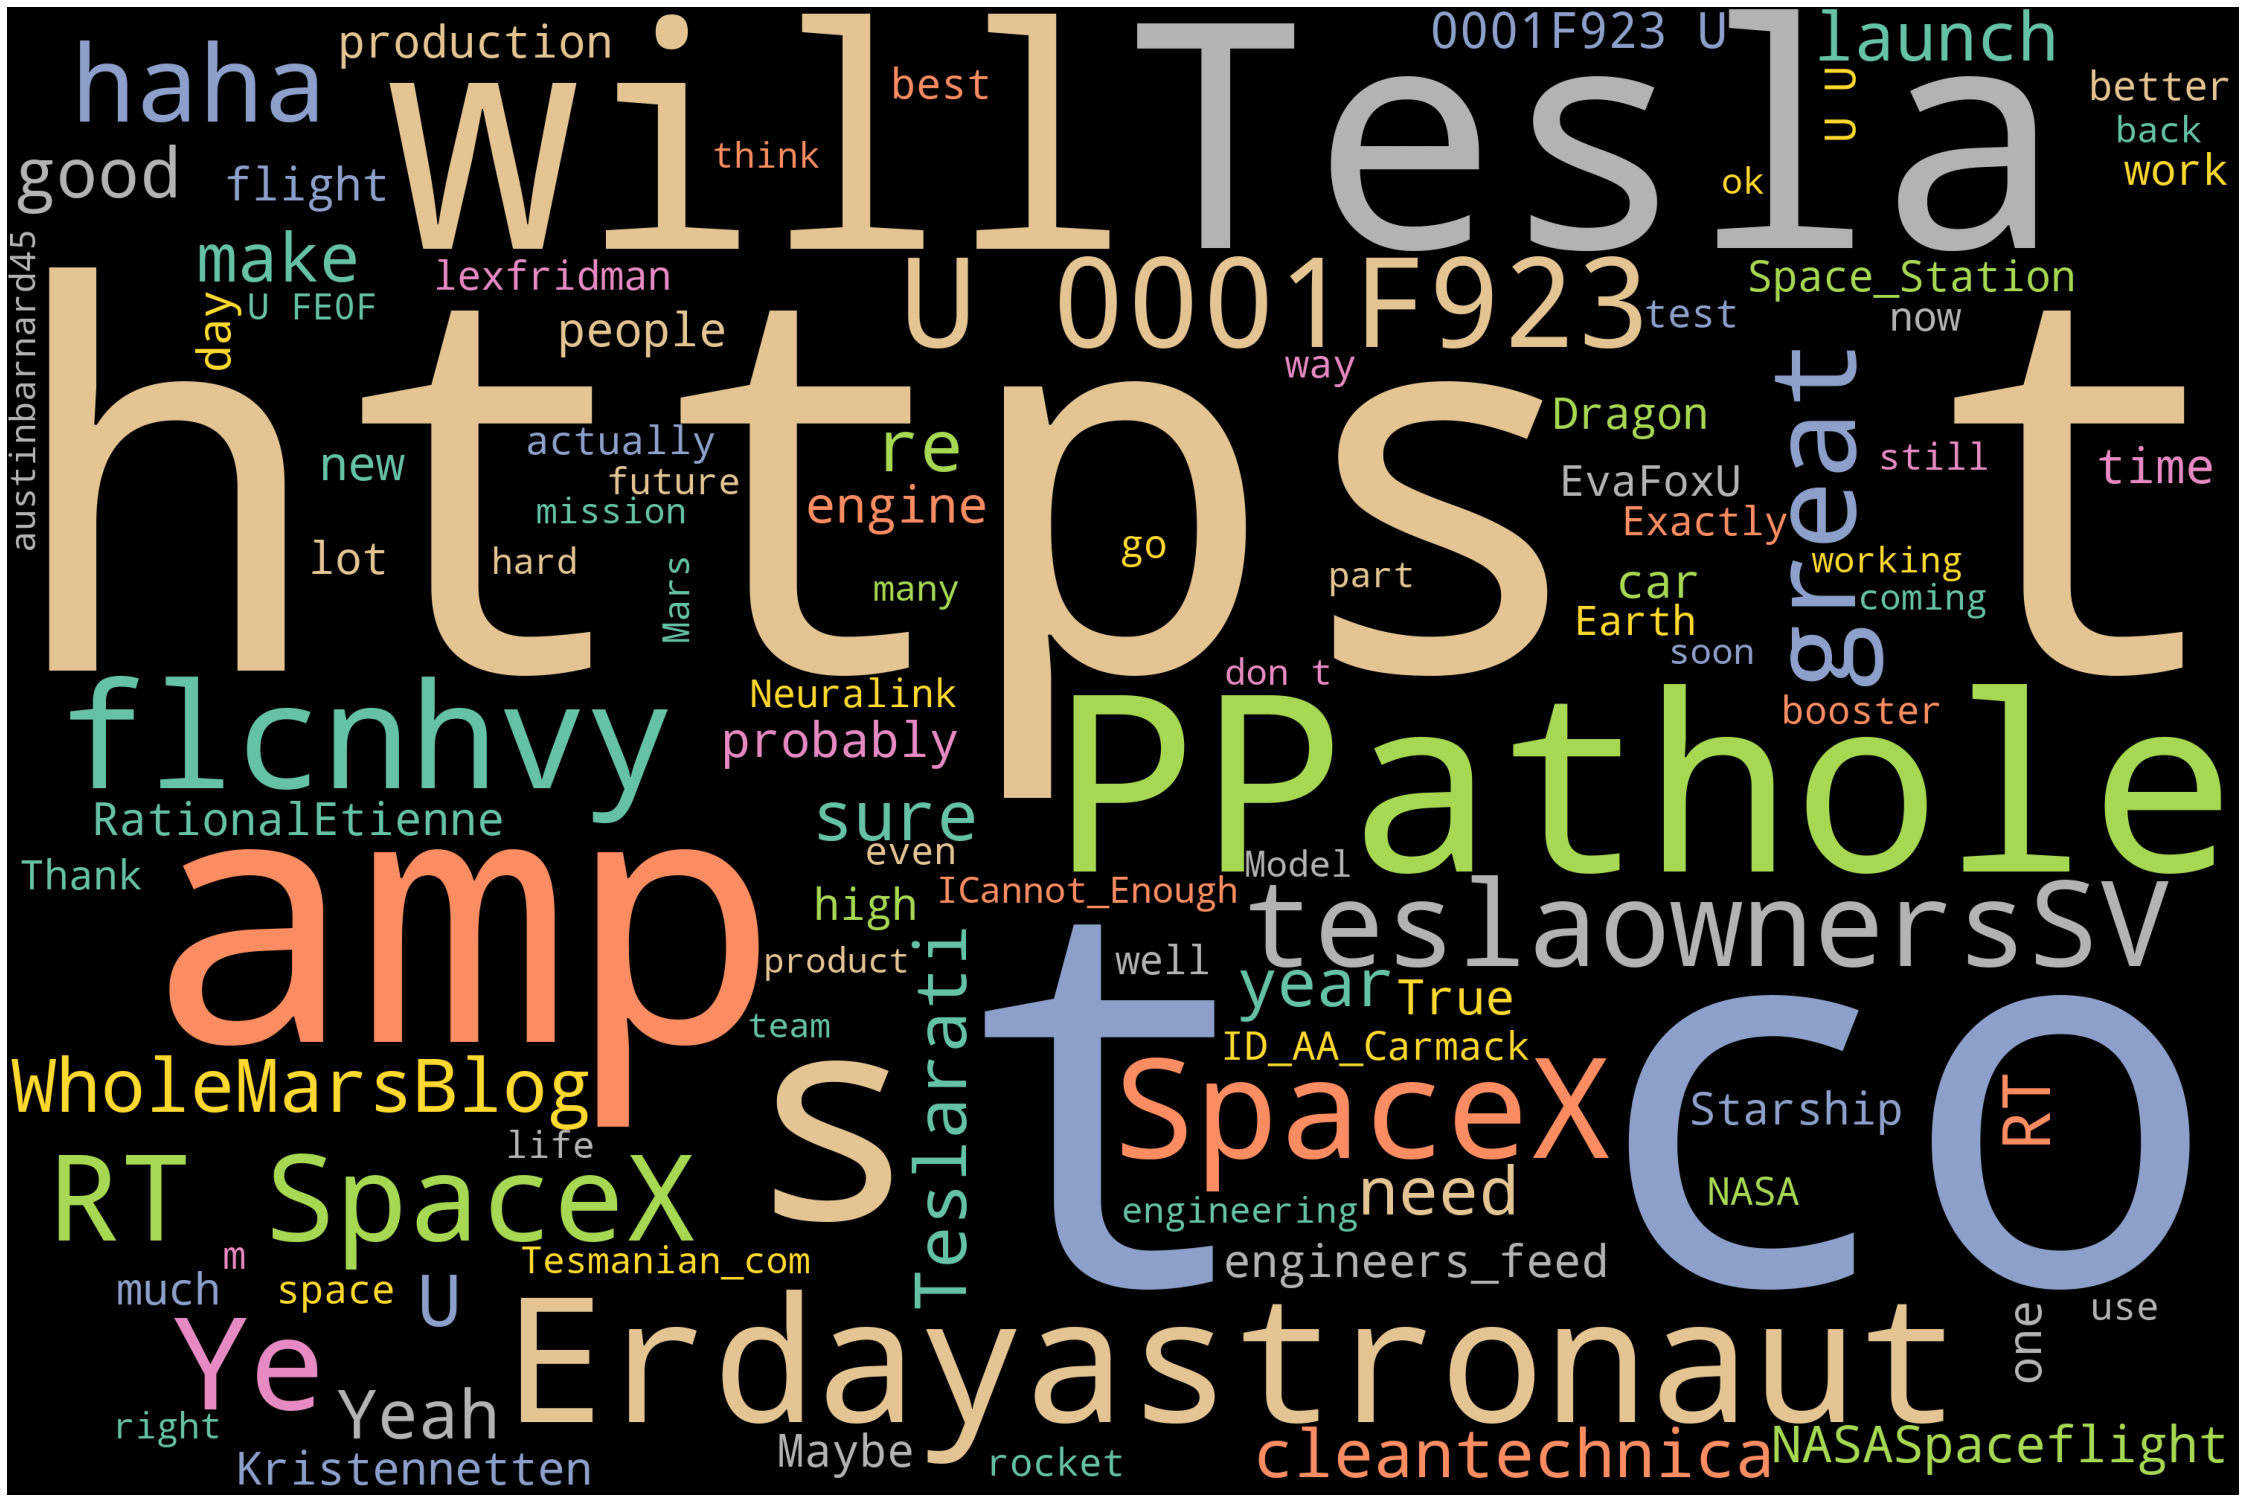

In [61]:
# Generate wordcloud
stopwords = STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text1)
# Plot
plot_cloud(wordcloud)

In [62]:
# Save image
wordcloud.to_file("wordcloud.png")

In [ ]:
## emotion mining

In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 

In [64]:
Elonmusk = pd.read_csv('Elon_musk.csv', encoding ='unicode_escape')
Elonmusk

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [65]:
Elonmusk = [Text.strip() for Text in Elonmusk.Text] # remove both the leading and the trailing characters
Elonmusk = [Text for Text in Elonmusk if Text] # removes empty strings, because they are considered in Python as False
Elonmusk[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [66]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')
from spacy import displacy



In [67]:
one_Elonmusk = Elonmusk[1000]
doc_Elonmusk = nlp(one_Elonmusk)
spacy.displacy.render(doc_Elonmusk, style='ent', jupyter=True) 

In [68]:
one_Elonmusk

'@shortword @jwangARK The SoC\x92s sync with each other 20 to 30 times/sec, exchanging output of NNs that should be in\x85 https://t.co/9cBJMEaaVW'

In [71]:
for token in doc_Elonmusk[0:100]:
    print(token, token.pos_) 

@shortword PUNCT
@jwangARK NOUN
The DET
SoCs PROPN
sync NOUN
with ADP
each DET
other ADJ
20 NUM
to PART
30 NUM
times NOUN
/ SYM
sec PROPN
, PUNCT
exchanging VERB
output NOUN
of ADP
NNs NOUN
that DET
should AUX
be VERB
in ADP
  SPACE
https://t.co/9cBJMEaaVW NUM


In [81]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_Elonmusk if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[1:100]) 

['sync', 'times', 'exchanging', 'output', 'NNs', 'be']


In [82]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10] 

,word,count
0,jwangark,1
1,sync,1
2,times,1
3,exchanging,1
4,output,1
5,nns,1
6,be,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

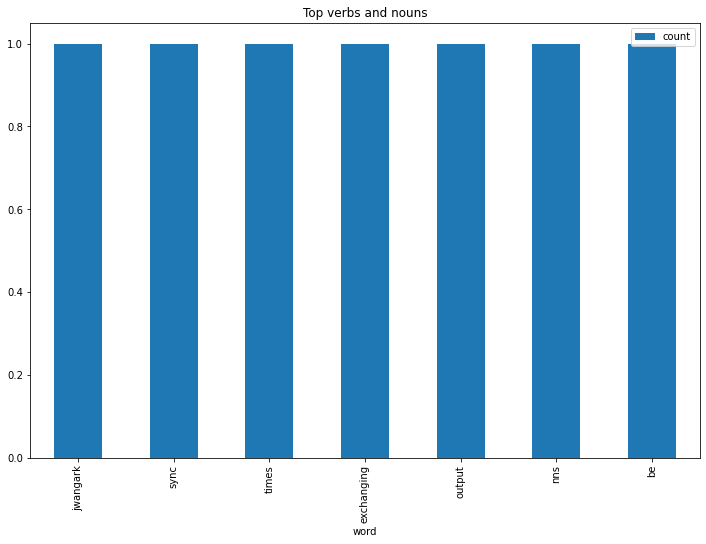

In [83]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns') 

In [ ]:
###Sentiment analysis

In [84]:
Elon_musk11 = pd.read_csv('Elon_musk.csv', sep=',', encoding='latin-1')
Elon_musk11.shape 

(1999, 2)

In [85]:
Elon_musk11.head() 

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
Elon_musk11 = pd.read_csv('Elon_musk.csv', encoding ='unicode_escape')
Elon_musk11 = [Text.strip() for Text in Elon_musk11.Text] # remove both the leading and the trailing characters
Elon_musk11 = [Text for Text in Elon_musk11 if Text] # removes empty strings, because they are considered in Python as False

In [87]:
from nltk.tokenize import TweetTokenizer

In [90]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(Elon_musk11))
sentences[5:15] 

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won\x92t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elem

In [92]:
sent_df = pd.DataFrame(sentences, columns=['Reviews'])
sent_df 

,Reviews
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [94]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = sent_df

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [99]:
sent_df['sentiment_value'] = sent_df['Reviews'].apply(calculate_sentiment) 

In [101]:
sent_df['word_count'] = sent_df['Reviews'].str.split().apply(len)
sent_df['word_count'].head(10) 

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [102]:
sent_df 

,Reviews,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,0,4
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13
4,Now on to the next for even more!!,0,8
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",0,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47


In [103]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,Reviews,sentiment_value,word_count
307,"Behind me is ""real"" #Dragon @Mario_Livio No ki...",0,39
308,Its more complex question and depends on why ...,0,37
309,"If you get a blood pressure test, they tell yo...",0,22
310,"Feels just like a regular cold, but more body ...",0,41
311,"@teslaownerssv Cool, but please be super cauti...",0,7
312,"Expect two steps forward, one back.",0,6
313,Lot of new code was merged.,0,6
314,@austinbarnard45 Just a scratch.,0,4
316,@erujabidi Am getting wildly different results...,0,37
923,@TeslaGong @PPathole Samwise Gamgee @PPathole ...,0,15


In [104]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    924.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: sentiment_value, dtype: float64

In [105]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head() 

,Reviews,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,0,4
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13
4,Now on to the next for even more!!,0,8


In [106]:
sent_df[sent_df['sentiment_value']>=20].head() 

,Reviews,sentiment_value,word_count


In [107]:
sent_df['index']=range(0,len(sent_df)) 

C:\Users\pa6039\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pa6039\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

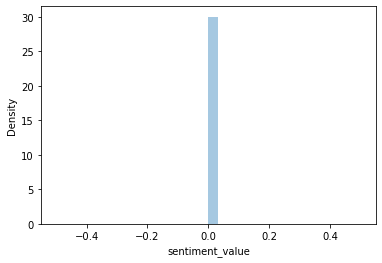

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

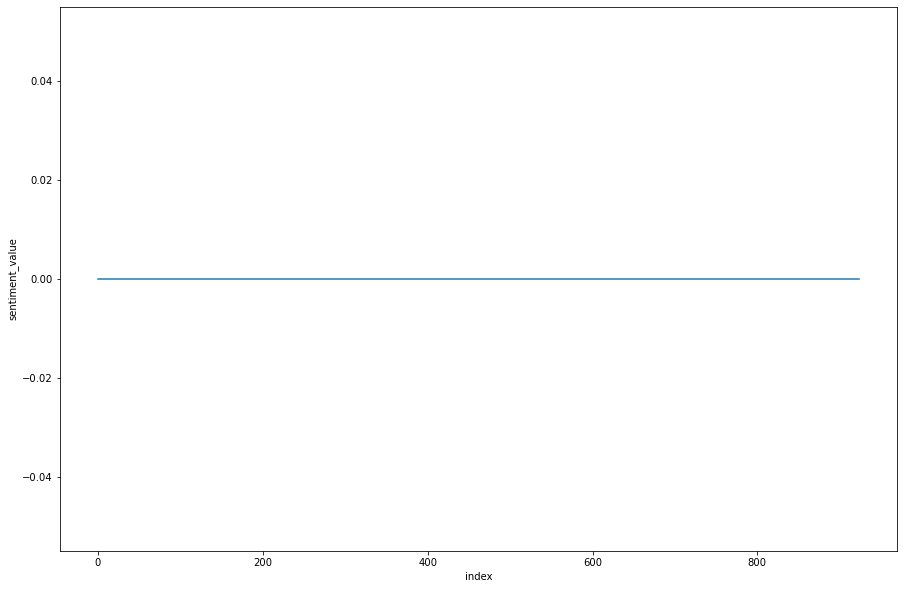

In [109]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 